## Import libraries

In [1]:
# Import Packages
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

## Import data and drop rows with missing labels

In [2]:
dataset = pd.read_csv('Consumer_Complaints.csv')
col = ['Product', 'Consumer Complaint']
dataset= dataset[col]

# Import data and drop rows with missing labels
dataset.dropna(subset=["Consumer Complaint"], inplace=True)
dataset.columns=['Product', 'ConsumerComplaint'] # Rename column
dataset['category_id'] = dataset['Product'].factorize()[0]

# print top 5 rows
dataset.head(5)
dataset=dataset[dataset['Product'].isin(['Credit reporting', 'Debt collection', 'Mortgage', 'Credit Card','Student loan','Bank account or service'])]
dataset['ConsumerComplaint'] = dataset['ConsumerComplaint'].map(lambda x: x.replace('XX',''))
dataset.head()

,Product,ConsumerComplaint,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2
25,Mortgage,Started the refinance of home mortgage process...,3


## Plot the data

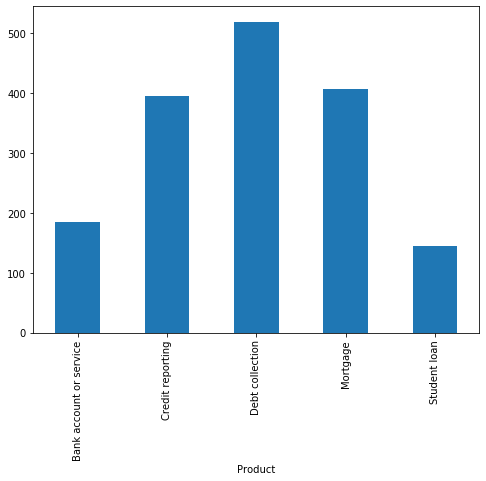

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (8,6))
dataset.groupby('Product').ConsumerComplaint.count().plot.bar(ylim=0)

## Run TF IDF Vectorizer on the text data

In [4]:
# Remove stop words
stopwords = [ "________________________________________from", "________________", "____", "00", "xxxx", "xx", "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

for word in stopwords :
    dataset['ConsumerComplaint'] = dataset['ConsumerComplaint'].replace(to_replace=r'\b%s\b'%word, value="",regex=True)

dataset['ConsumerComplaint'] = dataset['ConsumerComplaint'].str.replace('\d+', '')
dataset.head()

,Product,ConsumerComplaint,category_id
1,Credit reporting,I outdated information credit report I pr...,0
7,Credit reporting,An account credit report mistaken date. I ...,0
12,Debt collection,This company refuses provide verification v...,2
16,Debt collection,This complaint regards Square Two Financial...,2
25,Mortgage,Started refinance home mortgage process cas...,3


In [5]:
# Convert to lowercase
dataset['ConsumerComplaint'] = dataset['ConsumerComplaint'].str.lower()
dataset.head(100)

,Product,ConsumerComplaint,category_id
1,Credit reporting,i outdated information credit report i pr...,0
7,Credit reporting,an account credit report mistaken date. i ...,0
12,Debt collection,this company refuses provide verification v...,2
16,Debt collection,this complaint regards square two financial...,2
25,Mortgage,started refinance home mortgage process cas...,3
...,...,...,...
505,Debt collection,the company called revsolve inc.. the number...,2
506,Debt collection,i received letter holloway credit solutions...,2
512,Bank account or service,my husband opened health savings account ban...,6
528,Credit reporting,i sent letter credit bureaus. equifax cho...,0


In [6]:
x = dataset["ConsumerComplaint"]

cv2 = TfidfVectorizer(stop_words='english', max_features = 20000)
X_traincv = cv2.fit_transform(x)
X_traincv = normalize(X_traincv)

pd.DataFrame(X_traincv.toarray(), columns=cv2.get_feature_names()).head()

,________________________________________from,aacount,aadvantage,abandoned,abbreviated,abbreviations,abide,abilities,ability,able,...,york,young,yr,yrs,zero,zest,zfn,zip,zompie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train the model to find 5 clusters

In [7]:
model = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1)
model.fit(X_traincv)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Top terms per cluster

In [11]:
centroids = model.cluster_centers_
labels = model.labels_

order_centroids = centroids.argsort()[:, ::-1]
terms = cv2.get_feature_names()
for i in range(5):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Cluster 0: number phone called told calls
Cluster 1: credit report information account equifax
Cluster 2: loan mortgage payment payments home
Cluster 3: account bank check money checking
Cluster 4: debt collection credit company account


## Do some predictions and display the results

In [16]:
from sklearn.decomposition import PCA

# First: for every document we get its corresponding cluster
clusters = model.predict(X_traincv)

# We train the PCA on the dense version of the tf-idf. 
pca = PCA(n_components=2)
two_dim = pca.fit_transform(X_traincv.todense())

scatter_x = two_dim[:, 0] # first principle component
scatter_y = two_dim[:, 1] # second principle component

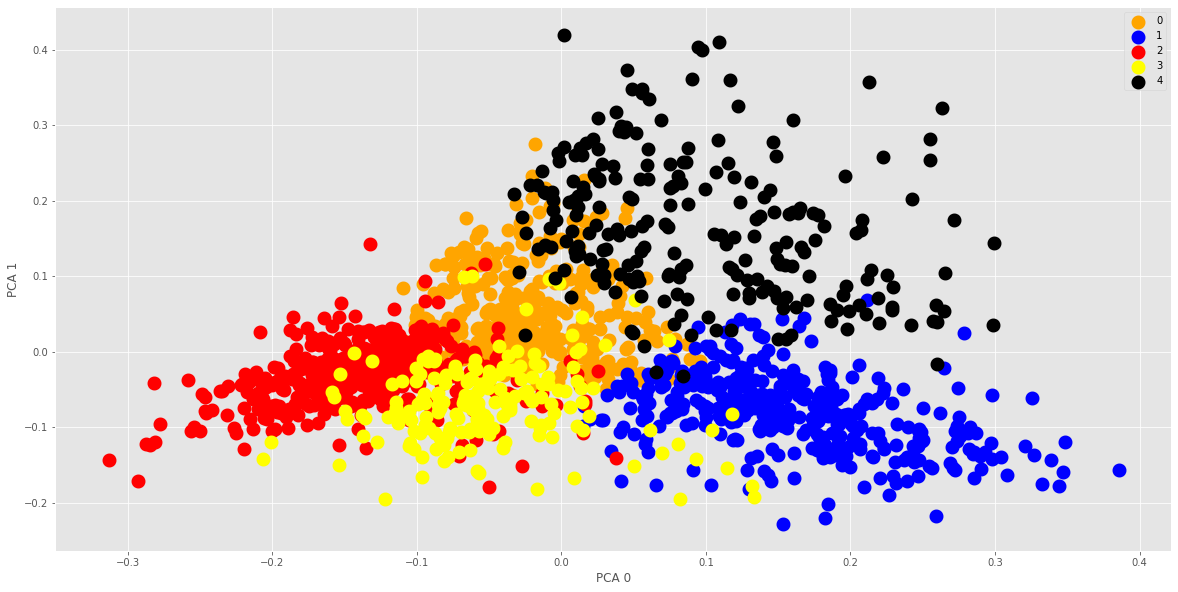

In [38]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

# color map for NUMBER_OF_CLUSTERS we have
cmap = {0: 'orange', 1: 'blue', 2: 'red', 3: 'yellow', 4: 'black'}

# group by clusters and scatter plot every cluster
# with a colour and a label
for group in np.unique(clusters):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group, s=80, linewidths=5, zorder=10)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()

In [21]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = cv2.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: number phone called told calls company calling debt received work
Cluster 1: credit report information account equifax accounts reporting experian transunion removed
Cluster 2: loan mortgage payment payments home loans modification pay told month
Cluster 3: account bank check money checking america told chase fees deposit
Cluster 4: debt collection credit company account report agency collect letter validation


In [130]:
predicted = model.predict(cv2.transform(["I would like to pay my outstanding balance please",
                             "Please send me my latest home loan statement",
                             "My account balance is incorrect",
                             "I lost my credit card yesterday",
                             "I need to finance my student loan please",
                             "student"]))
predicted

array([1, 3, 4, 2, 1, 1])